In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

## Lets load the Network Traffic Forecasting Dataset

In [4]:
data_Institutions= pd.read_csv(r"C:\Users\shaik\Downloads\institutions\institutions\agg_1_day\0.csv")

In [5]:
data_time= pd.read_csv(r"C:\Users\shaik\Downloads\times\times\times_1_day.csv")

## Preparing The Dataset

In [5]:
data_Institutions.head()

,id_time,n_flows,n_packets,n_bytes,sum_n_dest_asn,average_n_dest_asn,std_n_dest_asn,sum_n_dest_ports,average_n_dest_ports,std_n_dest_ports,sum_n_dest_ip,average_n_dest_ip,std_n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl
0,0,17967588,2009822494,1937481519695,3582016,9.17,21.55,4112358,10.53,63.32,9354476,23.96,96.12,0.76,0.76,0.48,0.46,20.75,135.95
1,1,17222782,2063503609,2003213170261,3355633,8.79,20.64,3982232,10.43,132.03,8934780,23.39,95.48,0.76,0.75,0.49,0.47,21.05,135.18
2,2,19697341,2458140183,2431213005090,3628192,9.24,21.92,4971483,12.66,154.51,9823918,25.03,100.91,0.76,0.75,0.47,0.46,21.00,137.09
3,3,19702256,2321789135,2273312421852,3638413,9.25,21.49,4854918,12.34,139.36,9774857,24.85,99.45,0.76,0.75,0.48,0.46,20.70,136.28
4,4,17396165,2059123443,2007808467610,3716764,9.78,21.14,5006670,13.17,134.48,9061733,23.83,86.80,0.77,0.77,0.45,0.44,17.70,149.85


In [6]:
data_time.head()

,id_time,time
0,0,2023-10-09 00:00:00+00:00
1,1,2023-10-10 00:00:00+00:00
2,2,2023-10-11 00:00:00+00:00
3,3,2023-10-12 00:00:00+00:00
4,4,2023-10-13 00:00:00+00:00


In [7]:
data_Institutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_time                280 non-null    int64  
 1   n_flows                280 non-null    int64  
 2   n_packets              280 non-null    int64  
 3   n_bytes                280 non-null    int64  
 4   sum_n_dest_asn         280 non-null    int64  
 5   average_n_dest_asn     280 non-null    float64
 6   std_n_dest_asn         280 non-null    float64
 7   sum_n_dest_ports       280 non-null    int64  
 8   average_n_dest_ports   280 non-null    float64
 9   std_n_dest_ports       280 non-null    float64
 10  sum_n_dest_ip          280 non-null    int64  
 11  average_n_dest_ip      280 non-null    float64
 12  std_n_dest_ip          280 non-null    float64
 13  tcp_udp_ratio_packets  280 non-null    float64
 14  tcp_udp_ratio_bytes    280 non-null    float64
 15  dir_ra

In [8]:
data_Institutions.describe()

,id_time,n_flows,n_packets,n_bytes,sum_n_dest_asn,average_n_dest_asn,std_n_dest_asn,sum_n_dest_ports,average_n_dest_ports,std_n_dest_ports,sum_n_dest_ip,average_n_dest_ip,std_n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl
count,280.000000,2.800000e+02,2.800000e+02,2.800000e+02,2.800000e+02,280.000000,280.000000,2.800000e+02,280.000000,280.000000,2.800000e+02,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,139.500000,1.536455e+07,1.663713e+09,1.635151e+12,2.957255e+06,8.311286,18.920214,4.694321e+06,13.154000,143.394357,8.079266e+06,22.617893,107.829250,0.734821,0.729071,0.471571,0.464143,21.377250,136.422286
std,80.973247,4.028008e+06,4.887078e+08,4.756279e+11,5.348310e+05,0.742963,2.199116,1.129758e+06,2.443145,74.057105,1.798444e+06,3.061812,35.869339,0.026720,0.025748,0.024503,0.020302,2.687071,10.579928
min,0.000000,4.828816e+06,5.179198e+08,5.768081e+11,1.422013e+06,6.400000,12.340000,1.795917e+06,7.580000,31.220000,3.100782e+06,13.710000,41.920000,0.660000,0.660000,0.380000,0.390000,12.110000,121.710000
25%,69.750000,1.267476e+07,1.290785e+09,1.260628e+12,2.612782e+06,7.730000,17.325000,3.978091e+06,11.327500,80.612500,6.911916e+06,20.415000,78.530000,0.720000,0.710000,0.460000,0.450000,19.697500,128.315000
50%,139.500000,1.530098e+07,1.657088e+09,1.644842e+12,3.003594e+06,8.215000,18.970000,4.913574e+06,13.280000,140.125000,8.064158e+06,22.605000,100.955000,0.730000,0.730000,0.480000,0.470000,21.690000,134.500000
75%,209.250000,1.837831e+07,2.051798e+09,2.002705e+12,3.289654e+06,8.842500,20.535000,5.405134e+06,14.712500,189.257500,9.350265e+06,24.860000,137.887500,0.750000,0.750000,0.490000,0.480000,23.485000,141.940000
max,279.000000,2.407017e+07,2.870250e+09,2.817225e+12,4.111310e+06,10.000000,23.420000,8.302636e+06,21.030000,393.950000,1.167690e+07,29.000000,216.330000,0.800000,0.800000,0.520000,0.510000,26.340000,173.000000


In [9]:
data_Institutions.isnull().sum()

id_time                  0
n_flows                  0
n_packets                0
n_bytes                  0
sum_n_dest_asn           0
average_n_dest_asn       0
std_n_dest_asn           0
sum_n_dest_ports         0
average_n_dest_ports     0
std_n_dest_ports         0
sum_n_dest_ip            0
average_n_dest_ip        0
std_n_dest_ip            0
tcp_udp_ratio_packets    0
tcp_udp_ratio_bytes      0
dir_ratio_packets        0
dir_ratio_bytes          0
avg_duration             0
avg_ttl                  0
dtype: int64

## Analyzing The Correlated Features

In [10]:
data_Institutions.corr()

,id_time,n_flows,n_packets,n_bytes,sum_n_dest_asn,average_n_dest_asn,std_n_dest_asn,sum_n_dest_ports,average_n_dest_ports,std_n_dest_ports,sum_n_dest_ip,average_n_dest_ip,std_n_dest_ip,tcp_udp_ratio_packets,tcp_udp_ratio_bytes,dir_ratio_packets,dir_ratio_bytes,avg_duration,avg_ttl
id_time,1.000000,-0.570344,-0.427472,-0.391066,-0.724754,-0.720003,-0.666432,-0.687419,-0.580826,-0.434235,-0.582233,-0.481084,-0.533248,-0.555107,-0.645514,0.055225,0.089698,0.301940,-0.472201
n_flows,-0.570344,1.000000,0.925741,0.903999,0.910339,0.767396,0.902838,0.667996,0.409646,0.266801,0.976983,0.913530,0.552159,0.351373,0.407295,0.280783,0.071535,0.248953,0.019477
n_packets,-0.427472,0.925741,1.000000,0.996743,0.824309,0.694811,0.852056,0.443751,0.155199,0.040523,0.919394,0.884646,0.424801,0.248714,0.288779,0.294497,0.076557,0.342096,-0.105606
n_bytes,-0.391066,0.903999,0.996743,1.000000,0.788883,0.669593,0.833560,0.408316,0.126766,0.022865,0.897475,0.878570,0.406607,0.208144,0.250401,0.285534,0.065762,0.353730,-0.139305
sum_n_dest_asn,-0.724754,0.910339,0.824309,0.788883,1.000000,0.907814,0.906338,0.701938,0.443974,0.209035,0.926553,0.808184,0.509303,0.543933,0.590102,0.098853,-0.062014,0.003836,0.274745
average_n_dest_asn,-0.720003,0.767396,0.694811,0.669593,0.907814,1.000000,0.867041,0.552483,0.358853,0.098853,0.793173,0.769204,0.394707,0.548357,0.587871,-0.228616,-0.371287,-0.218982,0.382923
std_n_dest_asn,-0.666432,0.902838,0.852056,0.833560,0.906338,0.867041,1.000000,0.603376,0.366002,0.203008,0.913800,0.882533,0.502666,0.300312,0.375064,0.160346,-0.032148,0.153868,0.044350
sum_n_dest_ports,-0.687419,0.667996,0.443751,0.408316,0.701938,0.552483,0.603376,1.000000,0.938645,0.729233,0.637197,0.494164,0.637151,0.357365,0.439039,0.240030,0.198744,-0.025893,0.212044
average_n_dest_ports,-0.580826,0.409646,0.155199,0.126766,0.443974,0.358853,0.366002,0.938645,1.000000,0.819325,0.366269,0.260650,0.557983,0.247299,0.329697,0.136339,0.164574,-0.141311,0.221668
std_n_dest_ports,-0.434235,0.266801,0.040523,0.022865,0.209035,0.098853,0.203008,0.729233,0.819325,1.000000,0.198242,0.125586,0.489030,0.115741,0.195166,0.230314,0.253953,-0.004419,0.073220


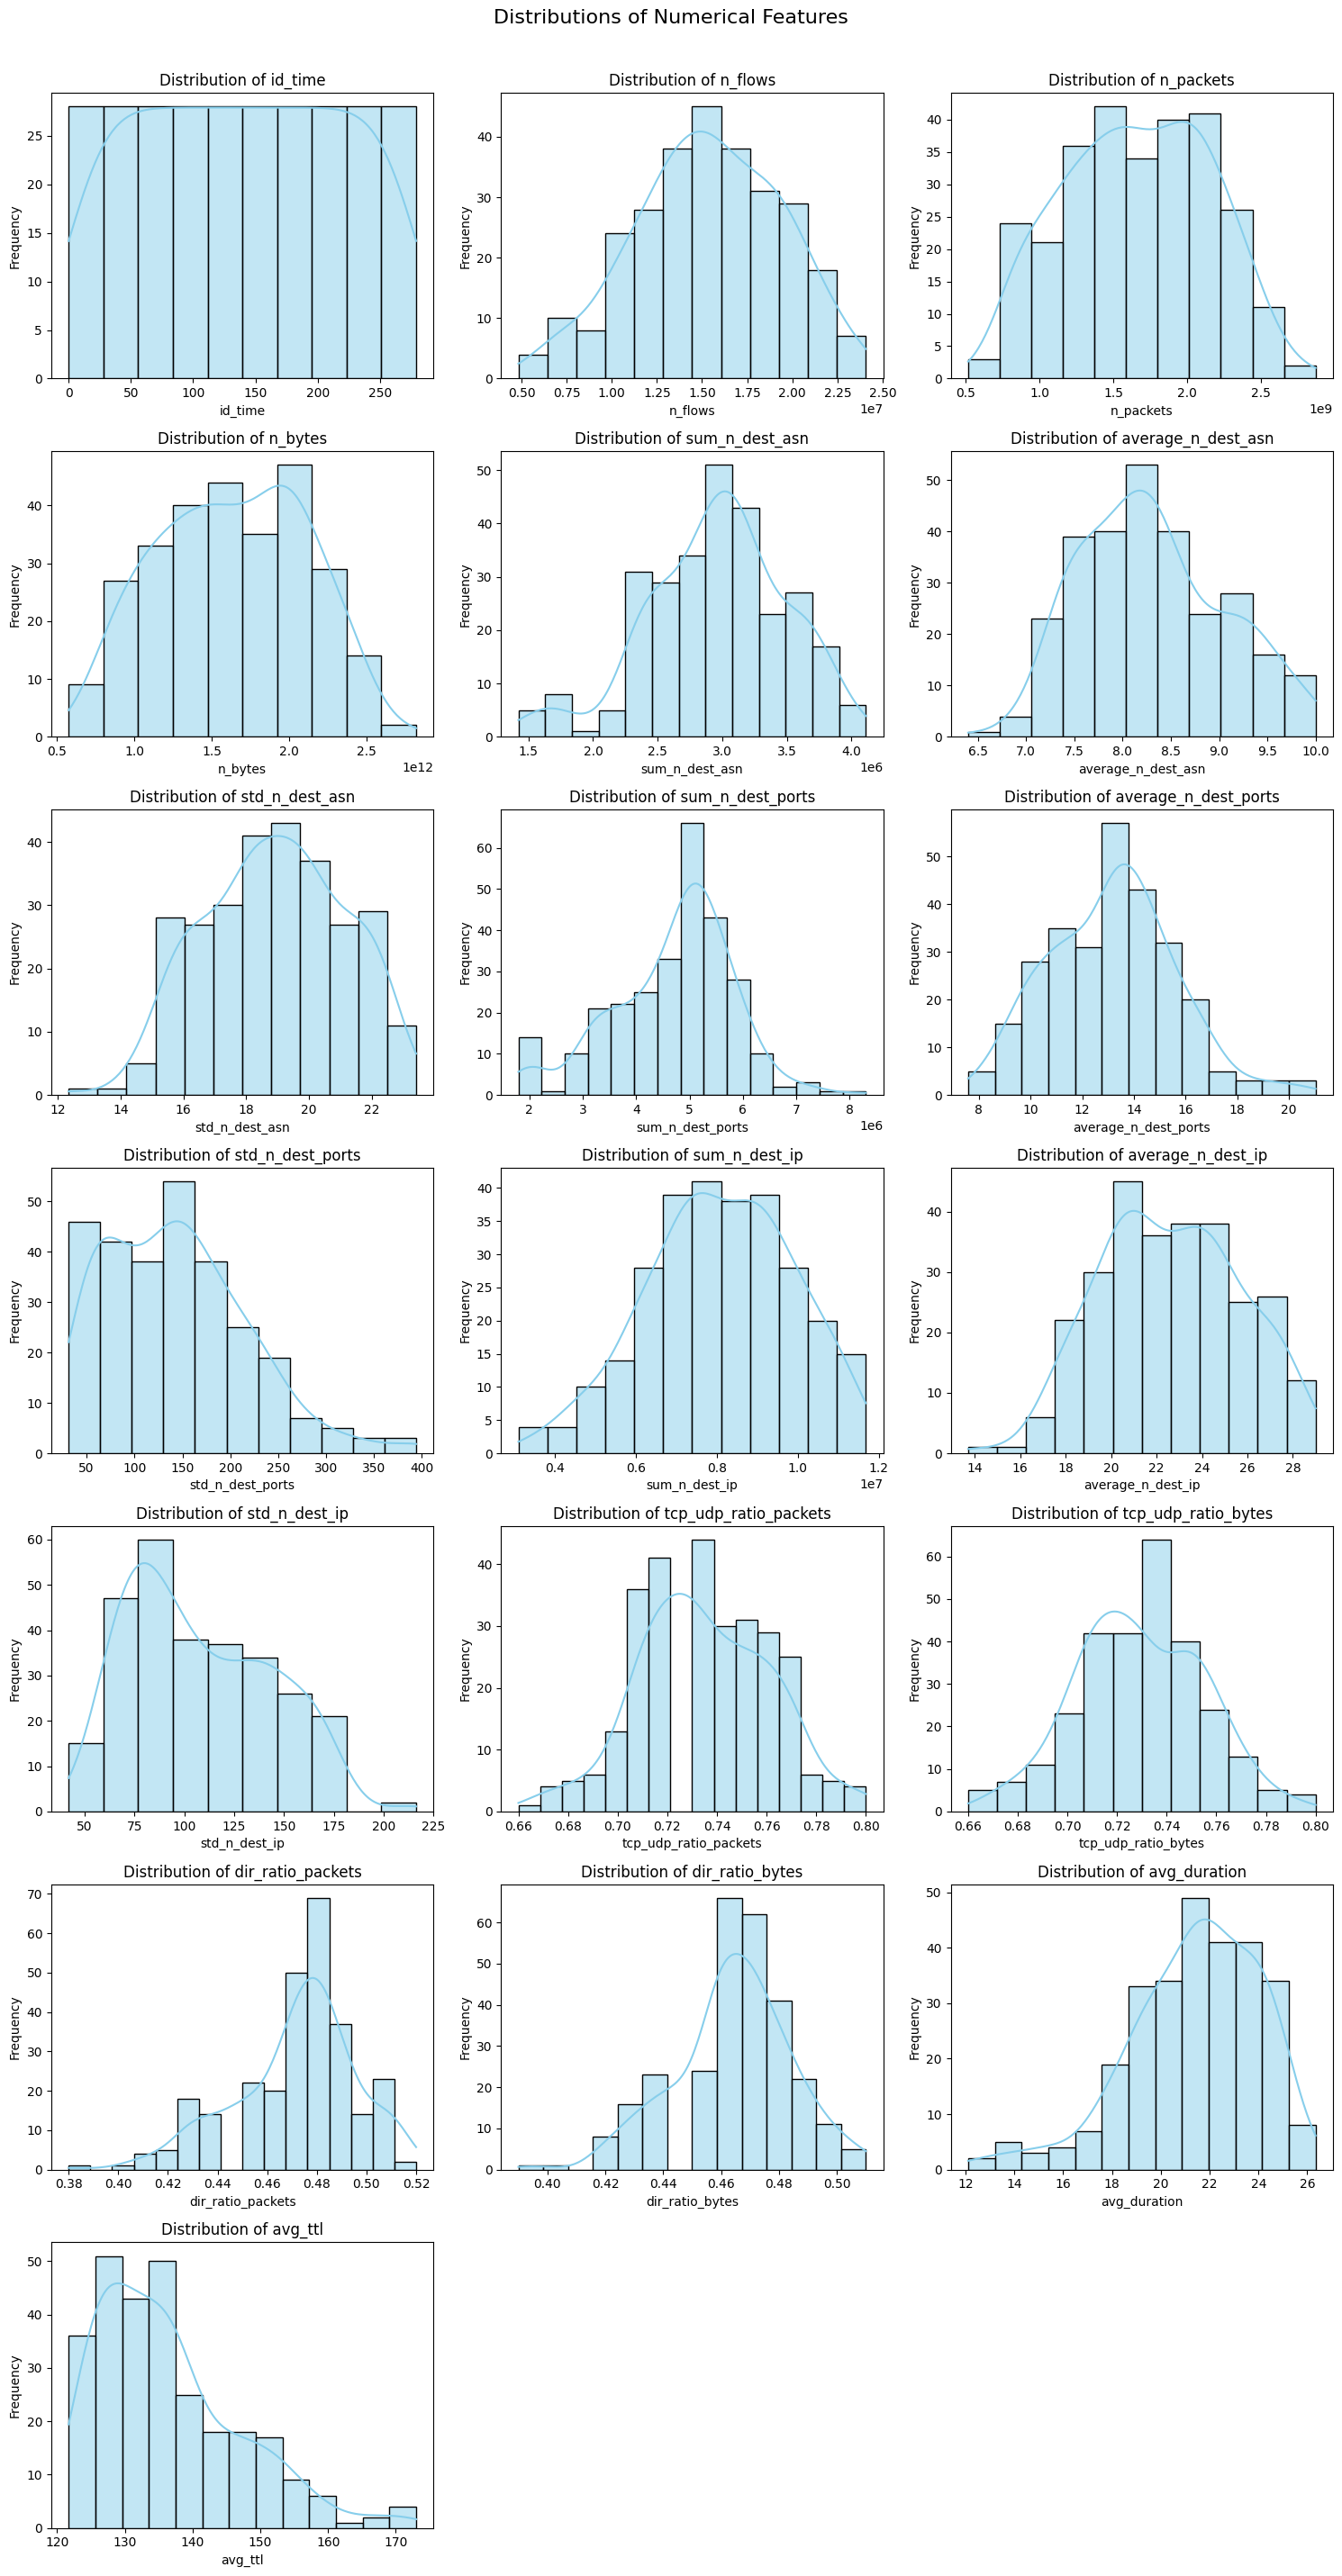

In [11]:
import seaborn as sns
num_cols = data_Institutions.select_dtypes(include=[np.number]).columns


n_cols = 3  
n_rows = int(np.ceil(len(num_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(data_Institutions[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distributions of Numerical Features', fontsize=16, y=1.02)
plt.show()

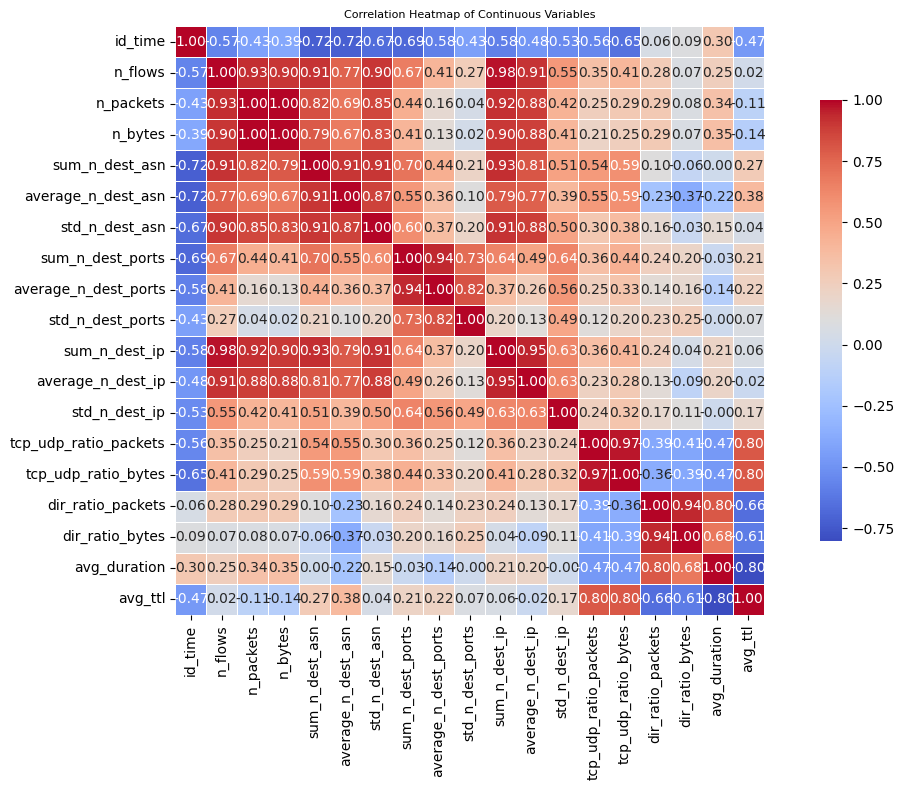

In [12]:
num_cols = data_Institutions.select_dtypes(include=[np.number])

corr_matrix = num_cols.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            square=True, linewidths=0.5, cbar_kws={"shrink": .75})

plt.title("Correlation Heatmap of Continuous Variables", fontsize=8)
plt.tight_layout()
plt.show()

In [6]:
merged_data = pd.merge(data_Institutions,data_time, on='id_time', how='outer')
merged_data.to_csv('merged_output.csv', index=False)

In [7]:
merged_data["time"] = pd.to_datetime(merged_data["time"])
merged_data = merged_data.sort_values("time").reset_index(drop=True)
merged_data.to_csv("merged_output.csv", index=False)

In [8]:
num_cols = merged_data.select_dtypes(include="number").columns

scaler = MinMaxScaler(feature_range=(0, 1))
merged_data[num_cols] = scaler.fit_transform(merged_data[num_cols])

In [16]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [9]:
window_size = 24       
target_col  = "n_bytes" 

values = merged_data[target_col].values          
dates  = merged_data["time"].values

X, y, target_dates = [], [], []

for i in range(window_size, len(values)):
    X.append(values[i - window_size:i])         
    y.append(values[i])                          
    target_dates.append(dates[i])               

X = np.array(X).reshape((-1, window_size, 1))  
y = np.array(y)
target_dates = np.array(target_dates)

In [10]:
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, target_dates,
    test_size=0.20,
    shuffle=False)

## LSTM Model

In [11]:
model_1 = Sequential()
model_1.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_1.add(Dropout(0.2))
model_1.add(LSTM(units=128, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(LSTM(units=64, return_sequences=True))
model_1.add(Dropout(0.2))
model_1.add(LSTM(units=32))  
model_1.add(Dropout(0.2))
model_1.add(Dense(1))
model_1.compile(optimizer='adam', loss='mean_squared_error')

e:\Network Forecasting\Network-Forecating-Deployment\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
history = model_1.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

predictions_LSTM = model_1.predict(X_test).flatten()


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step - loss: 0.0140 - val_loss: 0.0457
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0177 - val_loss: 0.0496
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0154 - val_loss: 0.0544
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0145 - val_loss: 0.0584
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0146 - val_loss: 0.0498
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0141 - val_loss: 0.0509
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0136 - val_loss: 0.0578
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0176 - val_loss: 0.0524
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0141 - val_loss: 0.0368
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0167 - val_loss: 0.0571
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0160 - val_loss: 0.0421
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17

In [46]:
rmse_LSTM = np.sqrt(np.mean((y_test - predictions_LSTM)**2))
print(f'RMSE: {rmse_LSTM:.2f}')

RMSE: 0.18


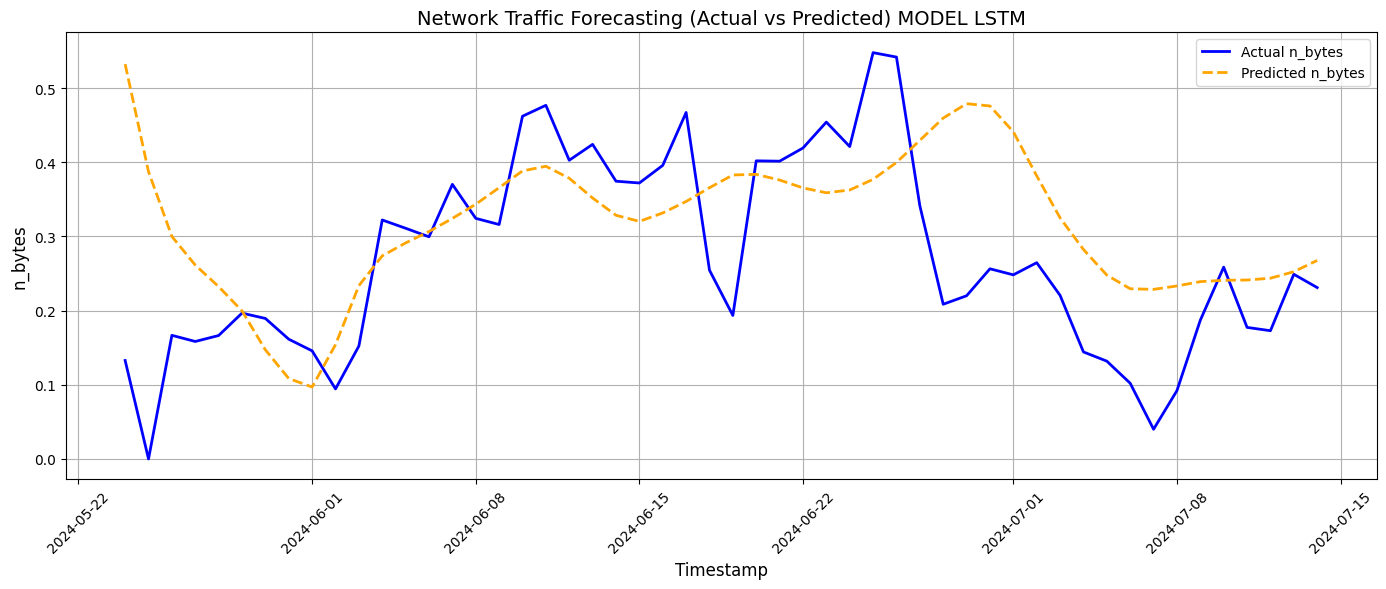

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Plot actual vs predicted ---
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, label='Actual n_bytes', color='blue', linewidth=2)
plt.plot(dates_test, predictions_LSTM, label='Predicted n_bytes', color='orange', linestyle='--', linewidth=2)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("n_bytes", fontsize=12)
plt.title("Network Traffic Forecasting (Actual vs Predicted) MODEL LSTM", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## GRU-FCN Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Conv1D, BatchNormalization, Activation, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
model_2 = Sequential()

model_2.add(GRU(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model_2.add(Dropout(0.2))

model_2.add(Conv1D(128, kernel_size=8, padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Conv1D(256, kernel_size=5, padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(Conv1D(128, kernel_size=3, padding='same'))
model_2.add(BatchNormalization())
model_2.add(Activation('relu'))

model_2.add(GlobalAveragePooling1D())
model_2.add(Dropout(0.2))

model_2.add(Dense(1))


e:\Network Forecasting\Network-Forecating-Deployment\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:

model_2.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
history = model_2.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)
predictions_GRUFCN = model_2.predict(X_test).flatten()
rmse_GRUFCN = np.sqrt(np.mean((y_test - predictions_GRUFCN) ** 2))
print(f'RMSE: {rmse_GRUFCN:.2f}')

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 0.7346 - val_loss: 0.2468
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.2329 - val_loss: 0.2368
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.1859 - val_loss: 0.2299
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.2028 - val_loss: 0.1077
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1366 - val_loss: 0.0962
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.1001 - val_loss: 0.1006
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1065 - val_loss: 0.1258
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0928 - val_loss: 0.1762
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0768 - val_loss: 0.1261
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.0828 - val_loss: 0.0718
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - loss: 0.0885 - val_loss: 0.0706
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 219m

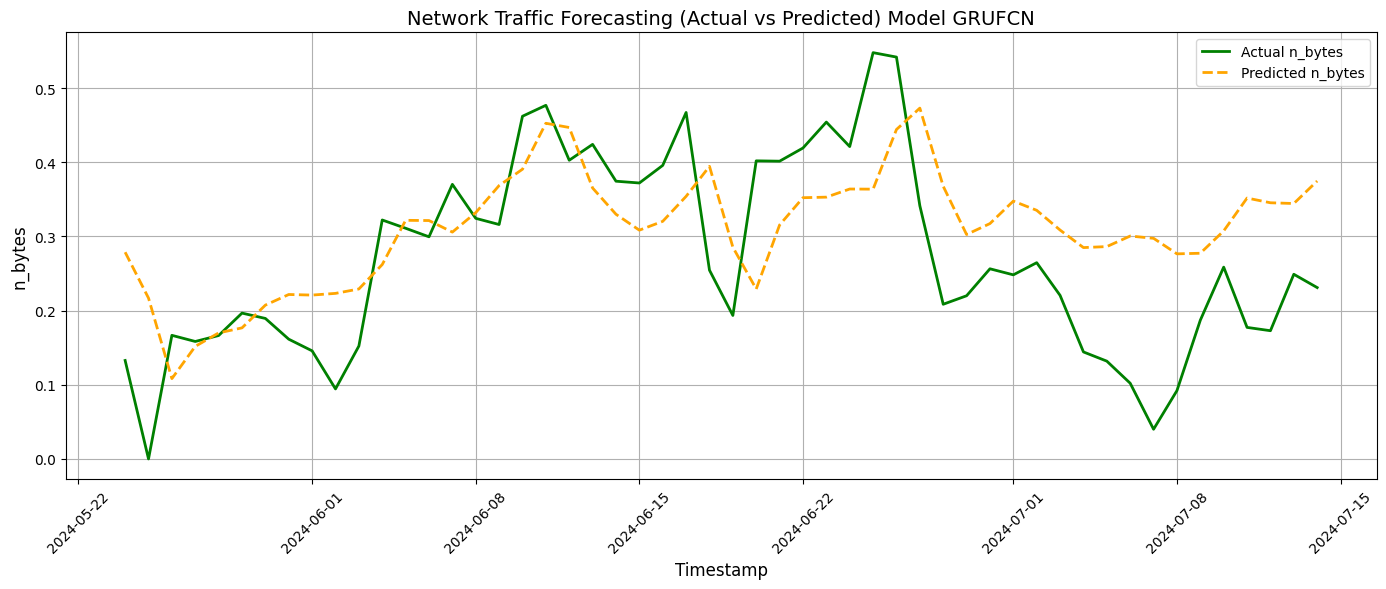

In [30]:
plt.figure(figsize=(14, 6))
plt.plot(dates_test, y_test, label='Actual n_bytes', color='green', linewidth=2)
plt.plot(dates_test, predictions_GRUFCN , label='Predicted n_bytes', color='orange', linestyle='--', linewidth=2)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("n_bytes", fontsize=12)
plt.title("Network Traffic Forecasting (Actual vs Predicted) Model GRUFCN", fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## saving the model for deployment

In [126]:
import pickle
# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model_1, file)


In [127]:
# Load the saved model
with open('model.pkl', 'rb') as file:
    model_loaded = pickle.load(file)


In [128]:
# Make predictions
predictions = model_loaded.predict(X_test)
print(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
[[0.4343714 ]
 [0.09361997]
 [0.0136978 ]
 [0.1165085 ]
 [0.2602559 ]
 [0.36088458]
 [0.38201988]
 [0.40544587]
 [0.35104188]
 [0.17010397]
 [0.14319073]
 [0.17567381]
 [0.20700607]
 [0.24913287]
 [0.3191021 ]
 [0.40646923]
 [0.48291907]
 [0.5407882 ]
 [0.58029306]
 [0.58480304]
 [0.5359064 ]
 [0.4010867 ]
 [0.28746843]
 [0.2956464 ]
 [0.3304488 ]
 [0.35297415]
 [0.32272953]
 [0.28893748]
 [0.24312961]
 [0.21385184]
 [0.22720708]
 [0.2715004 ]
 [0.31948435]
 [0.3678288 ]
 [0.42955434]
 [0.4845296 ]
 [0.48167905]
 [0.4584372 ]
 [0.3914454 ]
 [0.26424584]
 [0.16738537]
 [0.18210645]
 [0.27829784]
 [0.39860567]
 [0.4923293 ]
 [0.5336553 ]
 [0.5172721 ]
 [0.41791585]
 [0.21993682]
 [0.05374953]
 [0.12823802]
 [0.2879256 ]]
